#### Variables
**Starting**<br>
salary		： Original Dataset, Replace '?' to 'NaN'<br>
new_salary	: Remove Missing Values<br>
new_salary1	: Remove Outliers<br>

**Split data**<br>
X_train, X_test, y_train, y_test<br>
X_train_num<br>
X_train_cat <br>
X_train_num_tr : Standardize (numeric)<br>
X_train_tr      : Finalize Test Set<br>
X_test_tr      : Finalize Test Set<br>
X_train_cat_1 ~ 8 <br>
X_test_cat_1 ~ 8 

# Salary Prediction Model

## Import Python Libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sb

pd.options.mode.chained_assignment = None #turn off warning for SettingWithCopyWarning, 
                                          #used when convert quality into categorical type
import warnings
warnings.filterwarnings("ignore")

# Data Collection

In [2]:
#salary = pd.read_csv('SalaryBackup.csv')
salary = pd.read_csv("Salary.csv", na_values = "?")

# Data Explore

In [3]:
salary.head(10)

,work_type,age,weight,education,education_years,marital_status,occupation,relationship,race,sex,investment_gain,investment_loss,company_size,weekly_hours,country,salary_range
0,Private,19,216804,7th-8th,4.0,Never-married,Other-service,Own-child,White,Male,0,0,825,33,United-States,low
1,Private,23,207546,11th,7.0,Married-civ-spouse,Machine-op-inspct,Husband,White,Male,0,0,865,40,United-States,low
2,Private,41,253759,HS-grad,9.0,Never-married,Sales,Unmarried,Black,Female,0,0,727,40,United-States,low
3,Private,28,180928,Some-college,10.0,Married-civ-spouse,Handlers-cleaners,Husband,White,Male,5013,0,328,55,United-States,low
4,Private,17,208463,HS-grad,9.0,Never-married,Sales,Own-child,White,Female,0,0,977,20,United-States,low
5,Private,73,333676,HS-grad,9.0,Married-civ-spouse,Farming-fishing,Husband,White,Male,0,0,118,50,United-States,low
6,Local-gov,65,24824,HS-grad,9.0,Married-civ-spouse,Craft-repair,Husband,White,Male,0,0,793,40,United-States,low
7,Private,37,96330,Some-college,10.0,Never-married,Exec-managerial,Unmarried,Black,Female,0,0,193,40,United-States,low
8,Private,53,47396,HS-grad,9.0,Married-civ-spouse,Craft-repair,Husband,White,Male,0,0,427,40,United-States,low
9,NaN,61,166855,Bachelors,13.0,Married-civ-spouse,NaN,Husband,White,Male,0,0,164,10,United-States,low


In [4]:
salary.isnull().sum()

work_type          1836
age                   0
weight                0
education             0
education_years       9
marital_status        0
occupation         1843
relationship          0
race                  0
sex                   0
investment_gain       0
investment_loss       0
company_size          0
weekly_hours          0
country             583
salary_range          0
dtype: int64

In [5]:
#original shape of dataset
print("Shape",salary.shape)

Shape (32561, 16)


In [6]:
salary.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32561 entries, 0 to 32560
Data columns (total 16 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   work_type        30725 non-null  object 
 1   age              32561 non-null  int64  
 2   weight           32561 non-null  int64  
 3   education        32561 non-null  object 
 4   education_years  32552 non-null  float64
 5   marital_status   32561 non-null  object 
 6   occupation       30718 non-null  object 
 7   relationship     32561 non-null  object 
 8   race             32561 non-null  object 
 9   sex              32561 non-null  object 
 10  investment_gain  32561 non-null  int64  
 11  investment_loss  32561 non-null  int64  
 12  company_size     32561 non-null  int64  
 13  weekly_hours     32561 non-null  int64  
 14  country          31978 non-null  object 
 15  salary_range     32561 non-null  object 
dtypes: float64(1), int64(6), object(9)
memory usage: 4.0+ MB


In [7]:
salary.groupby('salary_range').size()

salary_range
high     7841
low     24720
dtype: int64

In [8]:
salary.columns

Index(['work_type', 'age', 'weight', 'education', 'education_years',
       'marital_status', 'occupation', 'relationship', 'race', 'sex',
       'investment_gain', 'investment_loss', 'company_size', 'weekly_hours',
       'country', 'salary_range'],
      dtype='object')

*Comment for the size of "salary_range":*<br>
- Maybe need to rebalance the class **(avoid imbalanced class result / imbalanced classification challenge)**

## Numerical Feaures Analysis

In [9]:
salary.describe() 

,age,weight,education_years,investment_gain,investment_loss,company_size,weekly_hours
count,32561.000000,3.256100e+04,32552.000000,32561.000000,32561.000000,32561.000000,32561.000000
mean,38.581647,1.897784e+05,10.080609,1077.648844,87.303830,500.930838,40.437456
std,13.640433,1.055500e+05,2.572762,7385.292085,402.960219,285.784842,12.347429
min,17.000000,1.228500e+04,1.000000,0.000000,0.000000,5.000000,1.000000
25%,28.000000,1.178270e+05,9.000000,0.000000,0.000000,254.000000,40.000000
50%,37.000000,1.783560e+05,10.000000,0.000000,0.000000,502.000000,40.000000
75%,48.000000,2.370510e+05,12.000000,0.000000,0.000000,745.000000,45.000000
max,90.000000,1.484705e+06,16.000000,99999.000000,4356.000000,1000.000000,99.000000


Summary of the describtion of the data:
---
1. Age   : 17 - 90 years old
2. Weight: 1.376900e+04 - 1.484705e+06
3. Education_years: 1 - 16 years
4. investment_gain: 0.00 - 99999.00
5. investment_loss: 0.00 - 4356.00
6. company_size   : 5 - 1000 employees
7. weekly_hours   : 1 - 99 hours

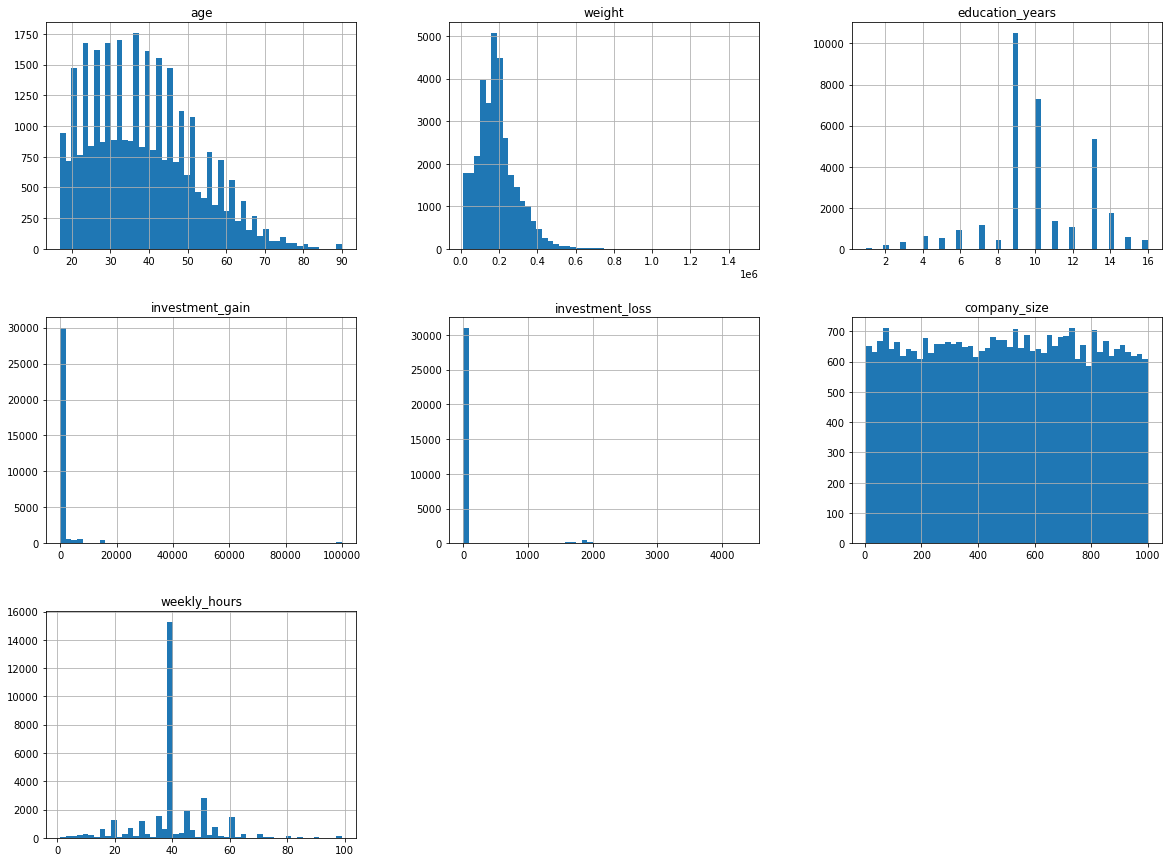

In [10]:
salary.hist(bins = 50, figsize = (20,15))
plt.show() 

Distribution data questions: <br>
    a. How is the distribution data - heavy tail issue<br>
        - 3 attributes (weight, investment_gain, investment_loss)<br>
    b. What is peculiar about the graph<br>
        - <br>
    c. Features that have different scales<br>
        - weekly_hours

## Categorical Features Analysis

In [11]:
salary.value_counts()

work_type    age  weight  education     education_years  marital_status      occupation         relationship   race                sex     investment_gain  investment_loss  company_size  weekly_hours  country        salary_range
Federal-gov  17   99893   11th          7.0              Never-married       Adm-clerical       Not-in-family  Black               Female  0                1602             415           40            United-States  low             1
Private      46   216164  HS-grad       9.0              Married-civ-spouse  Handlers-cleaners  Husband        White               Male    0                0                266           40            United-States  low             1
                  224559  HS-grad       9.0              Married-civ-spouse  Transport-moving   Husband        Black               Male    0                0                300           40            United-States  low             1
                  224202  Some-college  10.0             Married-civ-

Formulate data question of the: <br>
    a. How many possible values for the categorical feature<br>
        - 10 attributes<br>
    b. What is the most frequent value<br>
        - <br>
    c. What is the least frequent value<br>
        - <br>

# Data Visualization

## Correlation
1. Gives quantifiable relationship between features
2. Corr is calculated using various methods like 'pearson', 'spearman', etc.
3. Corr can be represented using correlation heatmap

In [12]:
salary.corr(method='spearman')

,age,weight,education_years,investment_gain,investment_loss,company_size,weekly_hours
age,1.000000,-0.078141,0.066267,0.124948,0.058484,0.002759,0.142907
weight,-0.078141,1.000000,-0.035704,-0.006039,-0.006914,0.003158,-0.021621
education_years,0.066267,-0.035704,1.000000,0.119170,0.074539,-0.010157,0.167127
investment_gain,0.124948,-0.006039,0.119170,1.000000,-0.066569,0.002377,0.093322
investment_loss,0.058484,-0.006914,0.074539,-0.066569,1.000000,0.003499,0.059852
company_size,0.002759,0.003158,-0.010157,0.002377,0.003499,1.000000,0.001347
weekly_hours,0.142907,-0.021621,0.167127,0.093322,0.059852,0.001347,1.000000


In [13]:
salary.corr()

,age,weight,education_years,investment_gain,investment_loss,company_size,weekly_hours
age,1.000000,-0.076646,0.036495,0.077674,0.057775,0.002589,0.068756
weight,-0.076646,1.000000,-0.043220,0.000432,-0.010252,0.004007,-0.018768
education_years,0.036495,-0.043220,1.000000,0.122649,0.079678,-0.007389,0.148050
investment_gain,0.077674,0.000432,0.122649,1.000000,-0.031615,0.004572,0.078409
investment_loss,0.057775,-0.010252,0.079678,-0.031615,1.000000,0.003726,0.054256
company_size,0.002589,0.004007,-0.007389,0.004572,0.003726,1.000000,0.000768
weekly_hours,0.068756,-0.018768,0.148050,0.078409,0.054256,0.000768,1.000000


Text(0.5, 1.0, '- Correlation matrix and Heatmap -')

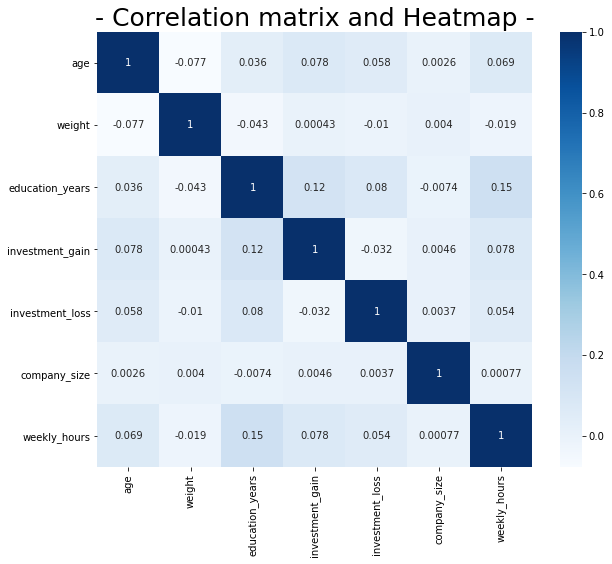

In [14]:
plt.figure(figsize =(10,8))
corrmat = salary.corr()
sb.heatmap(corrmat, square=True, annot=True, cbar=True, cmap="Blues");  #Blues
plt.title('- Correlation matrix and Heatmap -',fontsize = 25)

### Positive Correlation
- Age and Investment Gain
- Age and Investment Loss
- Weekly Hours and Age
- Weekly Hours and Education Years
- Education Years and Investment Gain
- Education Years and Investment Lost

### Negative Correlation
- Age and Weight
- Weight and Investment Lost
- Weight and Weekly Hours
- Investment Gain and Investment Loss
- Education Years and Company Size

*Observation: There are nothing much correlation between these numerical attributes

### BarPlot - Investment

<AxesSubplot:xlabel='salary_range', ylabel='investment_gain'>

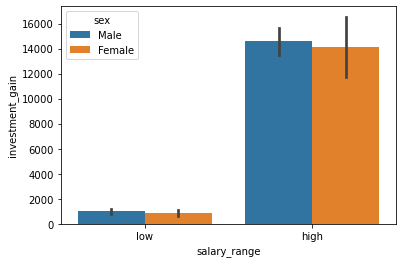

In [15]:
sb.barplot(x='salary_range',y='investment_gain',data=salary,estimator=np.std,hue='sex')

<AxesSubplot:xlabel='salary_range', ylabel='education_years'>

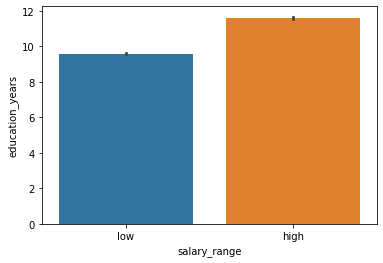

In [16]:
sb.barplot(x='salary_range',y='education_years',data=salary)

<AxesSubplot:xlabel='salary_range', ylabel='weekly_hours'>

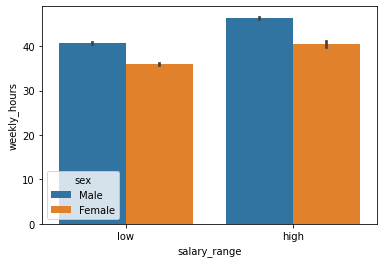

In [17]:
sb.barplot(x='salary_range',y='weekly_hours',data=salary, hue='sex')

Text(0.5, 1.0, '- Investment Gain of Different Races -')

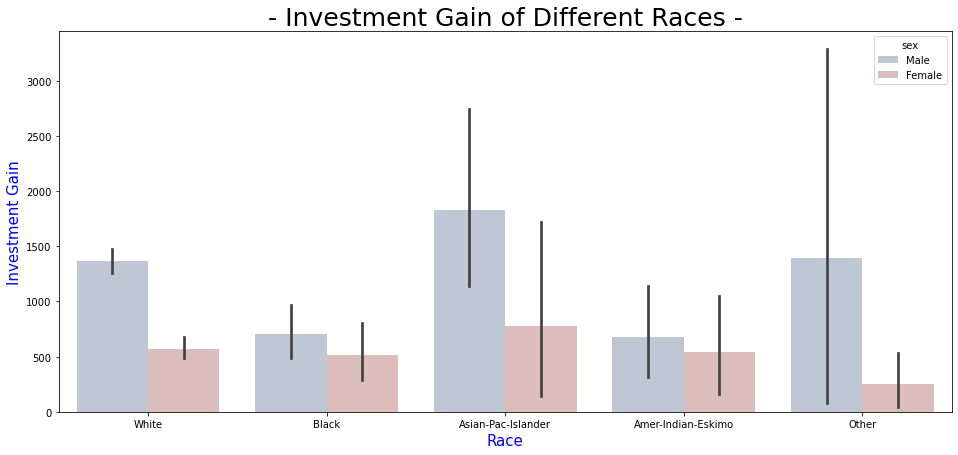

In [18]:
plt.figure(figsize =(16,7))
sb.barplot(x='race',y='investment_gain',data=salary, hue='sex',palette='vlag')

plt.xlabel('Race',fontsize = 15,color='blue')
plt.ylabel('Investment Gain',fontsize = 15,color='blue')
plt.title('- Investment Gain of Different Races -',fontsize = 25)

#### Asian Pacific Islanders has the highest investment gain while American Indian Eskimo has the lowest

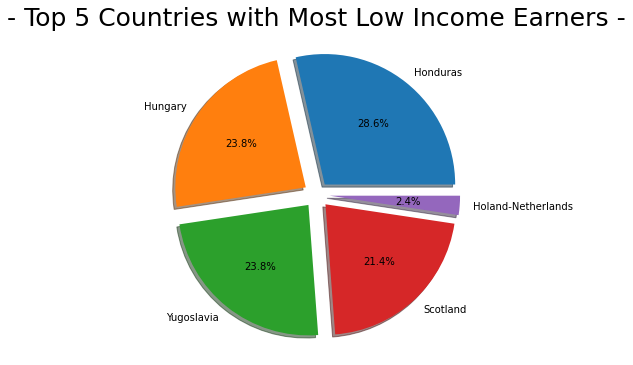

In [19]:
co = salary.groupby('salary_range')
top5 = co['country'].value_counts().tail(5)

x = top5
y = top5['low'].index.tolist()

fig, ex = plt.subplots(figsize=(10, 6))
explode = (0.1,0.1,0.1,0.1,0.1)
plt.pie(x, explode=explode,labels=y, autopct='%1.1f%%', shadow=True)
plt.title('- Top 5 Countries with Most Low Income Earners -',fontsize = 25)
plt.show()

co = salary.groupby('salary_range')
top5 = co['country'].value_counts().tail(5)

x = top5
y = top5['high'].index.tolist()

fig, ex = plt.subplots(figsize=(10, 6))
explode = (0.1,0.1,0.1,0.1,0.1)
plt.pie(x, explode=explode,labels=y, autopct='%1.1f%%', shadow=True)
plt.title('- Top 5 Countries with Most Low Income Earners -',fontsize = 25)
plt.show()

### Honduras has the highest number of people that are considered in the low salary range

Text(0.5, 1.0, '- Top 5 Countries with Most Number of High Income Earners -')

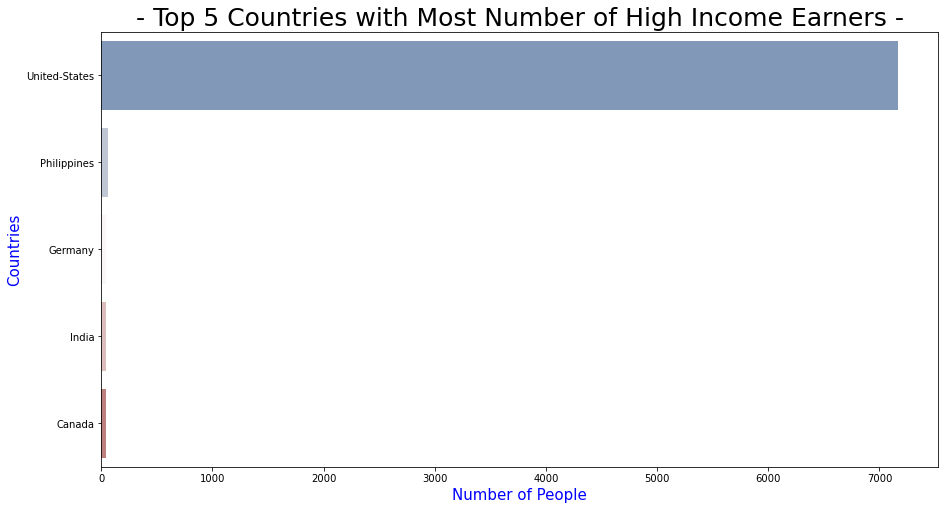

In [20]:
co = salary.groupby('salary_range')
top5 = co['country'].value_counts().head(5)

x = top5
y = top5['high'].index.tolist()

plt.figure(figsize =(15,8))
sb.barplot(x=x,y=y,data=salary,palette='vlag')

plt.xlabel('Number of People',fontsize = 15,color='blue')
plt.ylabel('Countries',fontsize = 15,color='blue')
plt.title('- Top 5 Countries with Most Number of High Income Earners -',fontsize = 25)

**Sort this into top 5 and the rest become "others"

#### Education

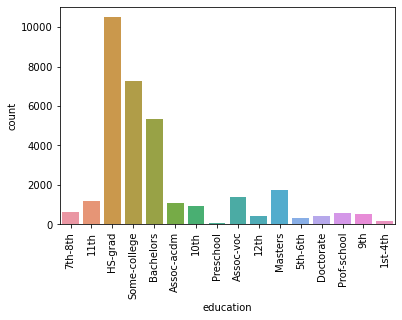

In [21]:
plot = sb.countplot(salary['education'])
plot.set_xticklabels(plot.get_xticklabels(),rotation=90)
plt.show()

#### Salary Range (Target)

[Text(0, 0, 'low'), Text(1, 0, 'high')]

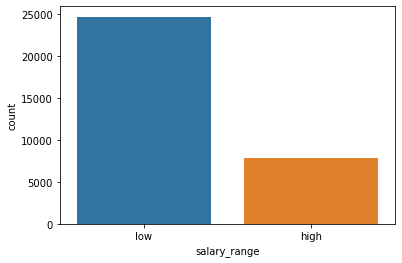

In [22]:
plot = sb.countplot(salary['salary_range'])
plot.set_xticklabels(plot.get_xticklabels())

#### Country

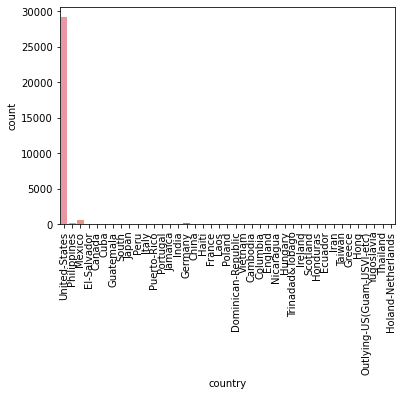

In [23]:
plot = sb.countplot(salary['country'])
plot.set_xticklabels(plot.get_xticklabels(),rotation=90)
plt.show()

---

# Data Preprocessing

### Handle Missing Data

In [24]:
salary.isnull().sum()

work_type          1836
age                   0
weight                0
education             0
education_years       9
marital_status        0
occupation         1843
relationship          0
race                  0
sex                   0
investment_gain       0
investment_loss       0
company_size          0
weekly_hours          0
country             583
salary_range          0
dtype: int64

In [25]:
#Drop First - for new_salary 
import copy
new_salary = copy.deepcopy(salary)
new_salary.dropna(inplace = True)
print('Original Attribute Shape:',salary.shape)
print('Clean Attribute Shape:',new_salary.shape)

Original Attribute Shape: (32561, 16)
Clean Attribute Shape: (30153, 16)


from sklearn.impute import SimpleImputer   

imputer = SimpleImputer(strategy = 'median')
imputer.fit(salary)                              # compute the median     
X_train_num_tr = imputer.transform(salary )       # fill up missing values with median value for the feature

* Result: 32561-30153 = 2408 missing values (have been removed)

In [26]:
new_salary.isnull().sum()

work_type          0
age                0
weight             0
education          0
education_years    0
marital_status     0
occupation         0
relationship       0
race               0
sex                0
investment_gain    0
investment_loss    0
company_size       0
weekly_hours       0
country            0
salary_range       0
dtype: int64

In [27]:
new_salary.head(10)

,work_type,age,weight,education,education_years,marital_status,occupation,relationship,race,sex,investment_gain,investment_loss,company_size,weekly_hours,country,salary_range
0,Private,19,216804,7th-8th,4.0,Never-married,Other-service,Own-child,White,Male,0,0,825,33,United-States,low
1,Private,23,207546,11th,7.0,Married-civ-spouse,Machine-op-inspct,Husband,White,Male,0,0,865,40,United-States,low
2,Private,41,253759,HS-grad,9.0,Never-married,Sales,Unmarried,Black,Female,0,0,727,40,United-States,low
3,Private,28,180928,Some-college,10.0,Married-civ-spouse,Handlers-cleaners,Husband,White,Male,5013,0,328,55,United-States,low
4,Private,17,208463,HS-grad,9.0,Never-married,Sales,Own-child,White,Female,0,0,977,20,United-States,low
5,Private,73,333676,HS-grad,9.0,Married-civ-spouse,Farming-fishing,Husband,White,Male,0,0,118,50,United-States,low
6,Local-gov,65,24824,HS-grad,9.0,Married-civ-spouse,Craft-repair,Husband,White,Male,0,0,793,40,United-States,low
7,Private,37,96330,Some-college,10.0,Never-married,Exec-managerial,Unmarried,Black,Female,0,0,193,40,United-States,low
8,Private,53,47396,HS-grad,9.0,Married-civ-spouse,Craft-repair,Husband,White,Male,0,0,427,40,United-States,low
10,Local-gov,30,44566,Bachelors,13.0,Married-civ-spouse,Prof-specialty,Husband,White,Male,0,0,833,80,United-States,low


In [28]:
new_salary.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 30153 entries, 0 to 32558
Data columns (total 16 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   work_type        30153 non-null  object 
 1   age              30153 non-null  int64  
 2   weight           30153 non-null  int64  
 3   education        30153 non-null  object 
 4   education_years  30153 non-null  float64
 5   marital_status   30153 non-null  object 
 6   occupation       30153 non-null  object 
 7   relationship     30153 non-null  object 
 8   race             30153 non-null  object 
 9   sex              30153 non-null  object 
 10  investment_gain  30153 non-null  int64  
 11  investment_loss  30153 non-null  int64  
 12  company_size     30153 non-null  int64  
 13  weekly_hours     30153 non-null  int64  
 14  country          30153 non-null  object 
 15  salary_range     30153 non-null  object 
dtypes: float64(1), int64(6), object(9)
memory usage: 3.9+ MB


In [29]:
#running a loop for value_counts of each column to find out unique values. 
for c in new_salary.columns:
    print ("---- %s ---" % c)
    print (new_salary[c].value_counts())

---- work_type ---
Private             22279
Self-emp-not-inc     2498
Local-gov            2067
State-gov            1279
Self-emp-inc         1074
Federal-gov           942
Without-pay            14
Name: work_type, dtype: int64
---- age ---
36    852
31    851
33    837
34    836
37    828
     ... 
82      7
83      5
85      3
88      3
86      1
Name: age, Length: 72, dtype: int64
---- weight ---
203488    13
113364    12
148995    12
121124    12
164190    12
          ..
282972     1
252253     1
344414     1
280927     1
145522     1
Name: weight, Length: 20260, dtype: int64
---- education ---
HS-grad         9838
Some-college    6675
Bachelors       5043
Masters         1627
Assoc-voc       1306
11th            1048
Assoc-acdm      1008
10th             819
7th-8th          557
Prof-school      541
9th              455
12th             377
Doctorate        375
5th-6th          288
1st-4th          151
Preschool         45
Name: education, dtype: int64
---- education_years ---

---

### Remove Outlier

<AxesSubplot:>

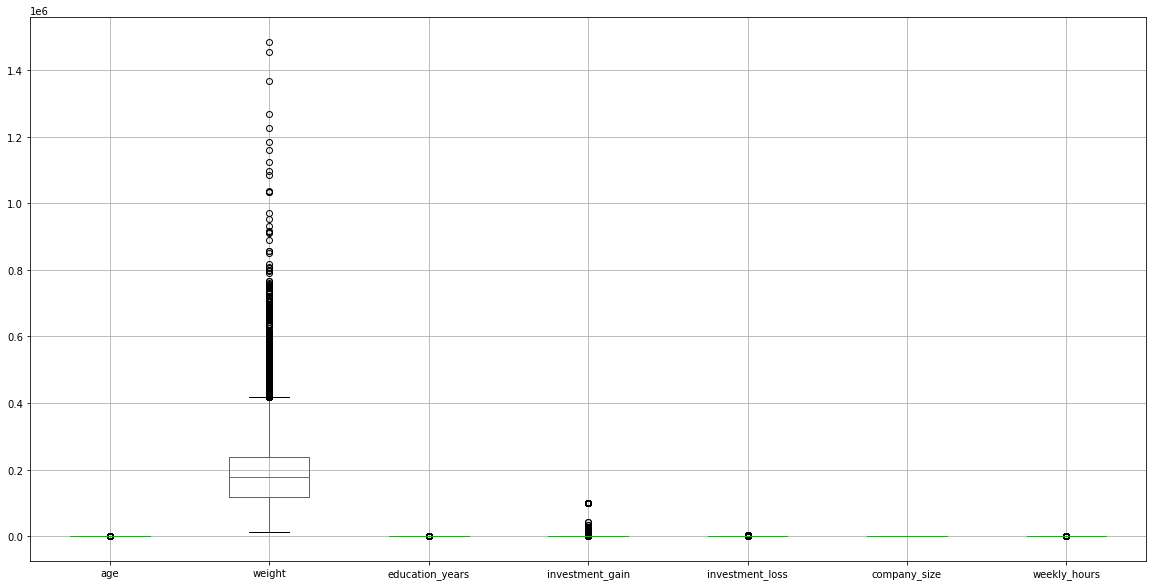

In [30]:
new_salary.boxplot(figsize=(20,10))

In [31]:
Z = (new_salary-new_salary.mean())/new_salary.std()
Z.describe()

,age,company_size,education_years,investment_gain,investment_loss,weekly_hours,weight
count,3.015300e+04,3.015300e+04,3.015300e+04,3.015300e+04,3.015300e+04,3.015300e+04,3.015300e+04
mean,-3.581816e-17,-7.069374e-17,6.150355e-17,-9.425831e-19,1.555262e-17,-1.042143e-16,-1.358498e-16
std,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00
min,-1.632126e+00,-1.738309e+00,-3.576911e+00,-1.474647e-01,-2.185333e-01,-3.332833e+00,-1.665962e+00
25%,-7.946425e-01,-8.629447e-01,-4.396992e-01,-1.474647e-01,-2.185333e-01,-7.762613e-02,-6.830671e-01
50%,-1.094289e-01,5.416791e-03,-4.754771e-02,-1.474647e-01,-2.185333e-01,-7.762613e-02,-1.076257e-01
75%,6.519197e-01,8.562710e-01,1.128907e+00,-1.474647e-01,-2.185333e-01,3.397081e-01,4.527480e-01
max,3.925718e+00,1.745641e+00,2.305361e+00,1.335236e+01,1.055805e+01,4.846918e+00,1.225594e+01


In [32]:
new_salary

,work_type,age,weight,education,education_years,marital_status,occupation,relationship,race,sex,investment_gain,investment_loss,company_size,weekly_hours,country,salary_range
0,Private,19,216804,7th-8th,4.0,Never-married,Other-service,Own-child,White,Male,0,0,825,33,United-States,low
1,Private,23,207546,11th,7.0,Married-civ-spouse,Machine-op-inspct,Husband,White,Male,0,0,865,40,United-States,low
2,Private,41,253759,HS-grad,9.0,Never-married,Sales,Unmarried,Black,Female,0,0,727,40,United-States,low
3,Private,28,180928,Some-college,10.0,Married-civ-spouse,Handlers-cleaners,Husband,White,Male,5013,0,328,55,United-States,low
4,Private,17,208463,HS-grad,9.0,Never-married,Sales,Own-child,White,Female,0,0,977,20,United-States,low
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32553,Private,52,146378,HS-grad,9.0,Married-civ-spouse,Craft-repair,Husband,White,Male,0,0,940,40,United-States,high
32555,Private,54,210736,HS-grad,9.0,Married-civ-spouse,Craft-repair,Husband,White,Male,0,0,843,40,United-States,high
32556,Self-emp-not-inc,56,84774,Assoc-acdm,12.0,Married-civ-spouse,Farming-fishing,Wife,White,Female,0,0,544,40,United-States,low
32557,Self-emp-inc,42,50122,HS-grad,9.0,Married-civ-spouse,Sales,Husband,White,Male,0,0,596,60,United-States,low


In [33]:
new_salary.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 30153 entries, 0 to 32558
Data columns (total 16 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   work_type        30153 non-null  object 
 1   age              30153 non-null  int64  
 2   weight           30153 non-null  int64  
 3   education        30153 non-null  object 
 4   education_years  30153 non-null  float64
 5   marital_status   30153 non-null  object 
 6   occupation       30153 non-null  object 
 7   relationship     30153 non-null  object 
 8   race             30153 non-null  object 
 9   sex              30153 non-null  object 
 10  investment_gain  30153 non-null  int64  
 11  investment_loss  30153 non-null  int64  
 12  company_size     30153 non-null  int64  
 13  weekly_hours     30153 non-null  int64  
 14  country          30153 non-null  object 
 15  salary_range     30153 non-null  object 
dtypes: float64(1), int64(6), object(9)
memory usage: 3.9+ MB


In [34]:
import scipy.stats as stats
import numpy as np
print('Number of rows before discarding outliers = %d' % (new_salary.shape[0]))

#since it can be remove the numerical attributes so we have to declare it before process
num_attribute = ['age','weight','education_years','investment_gain','investment_loss','company_size','weekly_hours']
z_scores = stats.zscore(new_salary[num_attribute])

abs_z_scores = np.abs(z_scores)
filtered_entries = (abs_z_scores <= 3).all(axis=1)
new_salary1 = new_salary[filtered_entries]

print('Number of rows after discarding outliers = %d' % new_salary1.shape[0])

Number of rows before discarding outliers = 30153
Number of rows after discarding outliers = 27613


### Check Duplicate

In [35]:
dups = new_salary1.duplicated()
print('Number of duplicate rows = %d' % (dups.sum()))

Number of duplicate rows = 0


*There is no any duplicate data*

---

# Preprocessing

There are various steps will be perform in this section:
1. Standardization
2. Normalization
3. Dummy Variables
4. Label Encoding vs OHE

**Standardization**
1. used when want to convert data into gaussian distribution meaning mean = 0 and variance = 1
2. less sensitive to Outliers
3. More  deviation on data

**Normalization**
1. Also known as minmax scaler and reduce data between (0 to 1) or (-1 to 1 in case of negative values) 
2. Sensitve t outliers 
3. Identically used when the deviation is small distribution is not gaussian 
4. Works better where standardization is not working fine.

## Handling Categorical Data

Methods involved in handling categorical data
1. Label Encoding: works well for ordinal data (eg: scale, values item)
2. dummy variable: for generating dummy data for replacing categorical data
3. OHE: works well with nominal data (eg: male, female)
4. Dict vectorize: use to combine steps label encoder and OHE

sal_dummy = pd.get_dummies(X_train_cat)
sal_dummy

## Handle Missing Data

Methods/Techniques used to handling missing values in dataset
1. dropna
2. fillna
3. Impute

### Separate output vector from input matrix 

new_salary1 = new_salary

In [36]:
new_salary1

,work_type,age,weight,education,education_years,marital_status,occupation,relationship,race,sex,investment_gain,investment_loss,company_size,weekly_hours,country,salary_range
0,Private,19,216804,7th-8th,4.0,Never-married,Other-service,Own-child,White,Male,0,0,825,33,United-States,low
1,Private,23,207546,11th,7.0,Married-civ-spouse,Machine-op-inspct,Husband,White,Male,0,0,865,40,United-States,low
2,Private,41,253759,HS-grad,9.0,Never-married,Sales,Unmarried,Black,Female,0,0,727,40,United-States,low
3,Private,28,180928,Some-college,10.0,Married-civ-spouse,Handlers-cleaners,Husband,White,Male,5013,0,328,55,United-States,low
4,Private,17,208463,HS-grad,9.0,Never-married,Sales,Own-child,White,Female,0,0,977,20,United-States,low
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32552,Local-gov,40,26929,Masters,14.0,Never-married,Prof-specialty,Not-in-family,White,Female,0,0,796,40,United-States,low
32553,Private,52,146378,HS-grad,9.0,Married-civ-spouse,Craft-repair,Husband,White,Male,0,0,940,40,United-States,high
32555,Private,54,210736,HS-grad,9.0,Married-civ-spouse,Craft-repair,Husband,White,Male,0,0,843,40,United-States,high
32556,Self-emp-not-inc,56,84774,Assoc-acdm,12.0,Married-civ-spouse,Farming-fishing,Wife,White,Female,0,0,544,40,United-States,low


In [37]:
#Drop targeted variable from the matrix X as the input matrix Y 
X = new_salary1.drop('salary_range', axis = 1)

#Convert the target attribute's value into boolean type (easy when process, since it only has "high" and "low")
new_salary1['salary_range'] = [1 if x=='high' else 0 for x in new_salary1['salary_range']]
y = new_salary1['salary_range']

In [38]:
#Show the shape and type class of the dataFrame for matrix X and Y
print("Shape original dataFrame", new_salary1.shape)
print("X shape",  X.shape, "type = ", type(X))
print("Y shape",  y.shape, "type = ", type(y))

Shape original dataFrame (27613, 16)
X shape (27613, 15) type =  <class 'pandas.core.frame.DataFrame'>
Y shape (27613,) type =  <class 'pandas.core.series.Series'>


### Split the Dataset - Training, Testing

In [39]:
#Load the python library - sklearn  
from sklearn.model_selection import train_test_split

#Split dataset into train and test set
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=10)

print('Original Dataset =', X.shape)
print('Training Dataset =', X_train.shape)
print('Testing Dataset =', X_test.shape)

Original Dataset = (27613, 15)
Training Dataset = (22090, 15)
Testing Dataset = (5523, 15)


### Split the input matrix - numerical and categorical sets

In [40]:
cat_attribute = ['work_type','education', 'marital_status', 'occupation', 'relationship','race','sex','country']
X_train_num = X_train.drop(cat_attribute, axis = 1)
X_train_cat = X_train[cat_attribute]

In [41]:
print(X_train_num.shape)
print(X_train_cat.shape)

(22090, 7)
(22090, 8)


### Standardize numeric data

In [42]:
from sklearn.preprocessing import StandardScaler

#Standardisation of the Numerical Attribute
X_train_num_tr = StandardScaler().fit_transform(X_train_num)

In [43]:
print('Mean:\n',X_train_num_tr.mean (axis=0))
print('\nStandard Deviation:\n',X_train_num_tr.std (axis=0))

Mean:
 [-4.34238431e-17 -8.41135923e-17 -9.00642671e-17  4.35846721e-17
  2.92708868e-17  5.40385603e-17  4.69620821e-17]

Standard Deviation:
 [1. 1. 1. 1. 1. 1. 1.]


In [44]:
X_train_num_tr  #transformed into ndArray

array([[ 1.24813811e+00,  1.35265614e+00,  2.42197148e+00, ...,
        -3.87797548e-02, -1.17228323e+00,  5.19253286e-01],
       [ 7.01995793e-01, -6.67249428e-01,  1.59782776e+00, ...,
        -3.87797548e-02, -1.92841885e-01, -2.22117605e-01],
       [-3.12268519e-01, -8.49470503e-03, -4.62531543e-01, ...,
        -3.87797548e-02, -5.39144360e-01, -1.89020211e+00],
       ...,
       [-7.82075239e-02, -1.08268853e+00, -2.11081898e+00, ...,
        -3.87797548e-02, -7.44763068e-03,  2.74336596e+00],
       [-9.36431172e-01, -4.55935384e-01, -5.04596823e-02, ...,
        -3.87797548e-02,  1.06294184e+00, -3.67748825e-02],
       [-1.87192285e-04,  1.26547906e+00, -4.62531543e-01, ...,
        -3.87797548e-02,  4.05316936e-01,  4.26581925e-01]])

### One-hot encode categorical data

In [45]:
X_train_cat.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 22090 entries, 22612 to 20846
Data columns (total 8 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   work_type       22090 non-null  object
 1   education       22090 non-null  object
 2   marital_status  22090 non-null  object
 3   occupation      22090 non-null  object
 4   relationship    22090 non-null  object
 5   race            22090 non-null  object
 6   sex             22090 non-null  object
 7   country         22090 non-null  object
dtypes: object(8)
memory usage: 1.5+ MB


### **This is a new type of code (our own)

# One-hot encode categorical data
from sklearn.preprocessing import LabelBinarizer
cat_col = [X_train_cat1,X_train_cat2,X_train_cat3,X_train_cat4,X_train_cat5,X_train_cat6,X_train_cat7,X_train_cat8]

def ohe(cat_col, col):
    cat_col[]=X_train_cat[col]
    lb_encoder = LabelBinarizer()
    cat1_encoder=LabelBinarizer()
    cat1_encoder.fit(X_train_cat1)
    X_train_cat_1=cat1_encoder.transform(X_train_cat1)      # returns numpy array
    print(X_train_cat_1.shape)
    
    #Combine all One Hot Encoded Category Lable in to one Numpy Array
    #combine=np.hstack((X_train_cat_1))
    #print("Combine",combine.shape)
    
for i in cat_attribute:
    ohe(i)

# Need to change!!!

In [46]:
#Seperate each of the Categorical Attribute for One Hot Encoding
X_train_cat1=X_train_cat.work_type
X_train_cat2=X_train_cat.education
X_train_cat3=X_train_cat.marital_status
X_train_cat4=X_train_cat.occupation
X_train_cat5=X_train_cat.relationship
X_train_cat6=X_train_cat.race
X_train_cat7=X_train_cat.sex
X_train_cat8=X_train_cat.country

In [47]:
#One hot Encoding for Training Set
from sklearn.preprocessing import LabelBinarizer


#FIXME!:Convert These to Loops!

#Instantaneous the LabelBinarizer Object for each Category
lb_encoder=LabelBinarizer()
cat1_encoder=LabelBinarizer()
cat2_encoder=LabelBinarizer()
cat3_encoder=LabelBinarizer()
cat4_encoder=LabelBinarizer()
cat5_encoder=LabelBinarizer()
cat6_encoder=LabelBinarizer()
cat7_encoder=LabelBinarizer()
cat8_encoder=LabelBinarizer()

#Create the Label Binarizer Encoder based on Training Set Values
cat1_encoder.fit(X_train_cat1)
cat2_encoder.fit(X_train_cat2)
cat3_encoder.fit(X_train_cat3)
cat4_encoder.fit(X_train_cat4)
cat5_encoder.fit(X_train_cat5)
cat6_encoder.fit(X_train_cat6)
cat7_encoder.fit(X_train_cat7)
cat8_encoder.fit(X_train_cat8)

#Return the One Hot Encoded value as another Variable
X_train_cat_1=cat1_encoder.transform(X_train_cat1)
X_train_cat_2=cat2_encoder.transform(X_train_cat2)
X_train_cat_3=cat3_encoder.transform(X_train_cat3)
X_train_cat_4=cat4_encoder.transform(X_train_cat4)
X_train_cat_5=cat5_encoder.transform(X_train_cat5)
X_train_cat_6=cat6_encoder.transform(X_train_cat6)
X_train_cat_7=cat7_encoder.transform(X_train_cat7)
X_train_cat_8=cat8_encoder.transform(X_train_cat8)

In [48]:
print("These are the number of different values per category")
print(X_train_cat_1.shape)
print(X_train_cat_2.shape)
print(X_train_cat_3.shape)
print(X_train_cat_4.shape)
print(X_train_cat_5.shape)
print(X_train_cat_6.shape)
print(X_train_cat_7.shape)
print(X_train_cat_8.shape)

These are the number of different values per category
(22090, 7)
(22090, 14)
(22090, 7)
(22090, 14)
(22090, 6)
(22090, 5)
(22090, 1)
(22090, 40)


In [49]:
#Combine all One Hot Encoded Category Lable in to one Numpy Array
combine=np.hstack((X_train_cat_1,X_train_cat_2,X_train_cat_3,X_train_cat_4,X_train_cat_5,X_train_cat_6,X_train_cat_7,X_train_cat_8))
combine.shape

(22090, 94)

### Finalize Train Set

In [50]:
#Combine Categorical and Numerical Data Together for Training Set

#Original Traning Set
X_train_tr=np.hstack((X_train_num_tr,combine))

print(X_train_tr.shape)          #Severly Inflate the Attribute Count

#Make sure the Samples are the same for X and y!
print(y_train.shape)

(22090, 101)
(22090,)


In [51]:
y_train.value_counts()

0    16982
1     5108
Name: salary_range, dtype: int64

*Observation: May cause Imbalanced Class result

## Preprocessing on Test set

*The preprocessing steps are almost same with training set

In [52]:
#Seperate Numerical and Categorical Data for Processing
cat_attribute = ['work_type','education', 'marital_status', 'occupation', 'relationship','race','sex','country']
X_test_num = X_test.drop(cat_attribute, axis = 1)
X_test_cat = X_test[cat_attribute]
print(X_test_num.shape)
print(X_test_cat.shape)

(5523, 7)
(5523, 8)


### Standardize on Test Set 

In [53]:
from sklearn.preprocessing import StandardScaler
X_test_num_tr = StandardScaler().fit_transform(X_test_num)

In [54]:
print('Mean:\n',X_test_num_tr.mean (axis=0))
print('\nStandard Deviation:\n',X_test_num_tr.std (axis=0))
X_test_num_tr  #transformed into ndArray

Mean:
 [-1.64674036e-16  1.30259736e-16 -2.32859379e-16 -3.47359295e-17
  0.00000000e+00 -6.43257954e-17 -3.01044722e-16]

Standard Deviation:
 [1. 1. 1. 1. 1. 1. 1.]


array([[ 1.53041655, -1.59985424,  1.18911884, ..., -0.03324539,
         1.21935166,  2.78879992],
       [-0.16262113,  0.91061055,  1.18911884, ..., -0.03324539,
         0.66840569,  0.44047916],
       [-0.23957739, -0.31376361, -0.44713238, ..., -0.03324539,
         0.34555838, -0.029185  ],
       ...,
       [ 0.99172275,  1.03925463, -0.44713238, ..., -0.03324539,
         1.0930201 , -0.49884915],
       [-0.3934899 , -0.11443479, -0.44713238, ..., -0.03324539,
         1.09652931, -0.029185  ],
       [ 1.53041655, -0.92495303, -0.44713238, ..., -0.03324539,
        -1.23007689, -2.84716991]])

### One Hot Encoding on Test Set

In [55]:
#Seperate each of the Categorical Attribute for One Hot Encoding
X_test_cat1=X_test_cat.work_type
X_test_cat2=X_test_cat.education
X_test_cat3=X_test_cat.marital_status
X_test_cat4=X_test_cat.occupation
X_test_cat5=X_test_cat.relationship
X_test_cat6=X_test_cat.race
X_test_cat7=X_test_cat.sex
X_test_cat8=X_test_cat.country

In [56]:
#One hot Encoding for Testing Set
from sklearn.preprocessing import LabelBinarizer

#Instantaneous the LabelBinarizer Object for each Category
lb_encoder=LabelBinarizer()
cat1_encoder=LabelBinarizer()
cat2_encoder=LabelBinarizer()
cat3_encoder=LabelBinarizer()
cat4_encoder=LabelBinarizer()
cat5_encoder=LabelBinarizer()
cat6_encoder=LabelBinarizer()
cat7_encoder=LabelBinarizer()
cat8_encoder=LabelBinarizer()

#Create the Label Binarizer Encoder based on Testing Set Values
cat1_encoder.fit(X_test_cat1)
cat2_encoder.fit(X_test_cat2)
cat3_encoder.fit(X_test_cat3)
cat4_encoder.fit(X_test_cat4)
cat5_encoder.fit(X_test_cat5)
cat6_encoder.fit(X_test_cat6)
cat7_encoder.fit(X_test_cat7)
cat8_encoder.fit(X_test_cat8)

#Return the One Hot Encoded value as another Variable
X_test_cat_1=cat1_encoder.transform(X_test_cat1)
X_test_cat_2=cat2_encoder.transform(X_test_cat2)
X_test_cat_3=cat3_encoder.transform(X_test_cat3)
X_test_cat_4=cat4_encoder.transform(X_test_cat4)
X_test_cat_5=cat5_encoder.transform(X_test_cat5)
X_test_cat_6=cat6_encoder.transform(X_test_cat6)
X_test_cat_7=cat7_encoder.transform(X_test_cat7)
X_test_cat_8=cat8_encoder.transform(X_test_cat8)

In [57]:
print("These are the number of different values per category")
print(X_test_cat_1.shape)
print(X_test_cat_2.shape)
print(X_test_cat_3.shape)
print(X_test_cat_4.shape)
print(X_test_cat_5.shape)
print(X_test_cat_6.shape)
print(X_test_cat_7.shape)
print(X_test_cat_8.shape)

These are the number of different values per category
(5523, 7)
(5523, 14)
(5523, 7)
(5523, 14)
(5523, 6)
(5523, 5)
(5523, 1)
(5523, 40)


In [58]:
#Combine all One Hot Encoded Category Lable in to one Numpy Array
combine_test=np.hstack((X_test_cat_1,X_test_cat_2,X_test_cat_3,X_test_cat_4,X_test_cat_5,X_test_cat_6,X_test_cat_7,X_test_cat_8))
combine_test.shape

(5523, 94)

### Finalize Test Set

In [59]:
#Combine Categorical and Numerical Data Together for Testing Dataset
X_test_tr=np.hstack((X_test_num_tr,combine_test))
#X_test_tr_std=np.hstack((X_test_num_std,combine_test))

print(X_test_tr.shape) 
print(y_test.shape)        #Make Sure the Sample Count on Both are the Same

(5523, 101)
(5523,)


In [60]:
print("Just the Summarize and Check,These are the information per array")
print('\nOriginal Dataset')
print('Salary',new_salary1.shape)
print('\nPreprocessed and Combined Training Set\n')
print('X_train_tr',X_train_tr.shape)
print('y_train',y_train.shape)

print('\nPreprocessed and Combined Testing Set')
print('X_test_tr',X_test_tr.shape)
print('y_test',y_test.shape)

print('\nNote: Make sure both X,Y have same No. of sample and Train/Test have same number of attribute')

Just the Summarize and Check,These are the information per array

Original Dataset
Salary (27613, 16)

Preprocessed and Combined Training Set

X_train_tr (22090, 101)
y_train (22090,)

Preprocessed and Combined Testing Set
X_test_tr (5523, 101)
y_test (5523,)

Note: Make sure both X,Y have same No. of sample and Train/Test have same number of attribute


### Data Preprocessing End
---

# Model Training
6 algorithms are used to train the model:
1. Logistic Regression
2. Decision Tree
3. Random Forest
4. K Nearest Neighbour
5. Stochastic Gradient Descent (SGD)
6. Multi-layer Perceptron (MLP)

### Functions for training operation process

In [61]:
from sklearn.metrics import accuracy_score, roc_auc_score, roc_curve, precision_recall_curve, confusion_matrix, classification_report
from sklearn.model_selection import cross_val_score, cross_validate, cross_val_predict

scores = ['accuracy', 'precision', 'recall', 'f1_macro']
overview = pd.DataFrame(columns = ["Fit Time","Score Time","Accuracy", "Precision", "Recall", "F1 score"])
clf = ["Logistic Regression", "Decision Tree Classifier", "Random Forest Classifier", "KNN Classifier", "Stochastic Gradient Descent", "MLP Classifier"]
model_arr = {}
y_pred_arr = {}
overview_acc = pd.DataFrame(columns=["Accuracy"])

### Training Function

In [62]:
from sklearn.metrics import f1_score, precision_score, recall_score

def train(model, i):
    model.fit(X_train_tr, y_train)
    y_pred = model.predict(X_train_tr)
    overview_acc.loc[i] = round(accuracy_score(y_pred, y_train)*100,4)
    print("Accuracy: ",round(accuracy_score(y_pred, y_train)*100,4))

### Cross Validation Function

In [63]:
def cross_val(model, i, x = X_train_tr, y = y_train):
    model.fit(x, y)
    model_arr[clf[i]] = model
    y_pred = cross_validate(model, x, y, cv= 5, scoring= scores)
    report = pd.DataFrame(y_pred)
    overview.loc[clf[i]] = ["{:.4f}".format(i) for i in report.mean().values]

### Classification Report Function

In [64]:
from sklearn.metrics import classification_report
def classifyReport(model, i):
    model.fit(X_train_tr, y_train)
    y_pred = cross_val_predict(model, X_train_tr, y_train, cv= 5)
    y_pred_arr[clf[i]] = y_pred
    print(clf[i], '\n')
    print('Classification Report:\n')
    print(classification_report(y_train, y_pred_arr[clf[i]]))

### Confusion Matrix Function

In [65]:
from sklearn.metrics import confusion_matrix
def confusionMatrix(model, i):
    #model.fit(X_train_tr, y_train)
    #y_pred = cross_val_predict(model, X_train_tr, y_train, cv= 5)
    print(clf[i])
    print('Confusion Matrix:')
    print(confusion_matrix(y_train,  y_pred_arr[clf[i]]))
    print('\nAccuracy:', accuracy_score(y_train, y_pred_arr[clf[i]]))
    tn, fp, fn, tp = confusion_matrix(y_train, y_pred_arr[clf[i]]).ravel()
    print("TN, FP, FN, TP : ", tn, fp, fn, tp)
    print("\n\n")

### Cross Validation Summary Graph

In [66]:
def cv_sum():
    pd.DataFrame([float(i) for i in overview.Accuracy], index=clf, columns=['Accuracy']).plot.bar()
    
    plt.legend(bbox_to_anchor=(1.1, 1.05))
    plt.xlabel("Machine Learning Algorithms")
    plt.ylabel("Accuracy Score")
    plt.title("Accuracy Graph")
    plt.show()

### Overview Performance Graph

In [67]:
def performance_sum():

    precision_sco = [float(i) for i in overview['Precision']]
    recall_sco    = [float(i) for i in overview['Recall']]
    f1_sco        = [float(i) for i in overview['F1 score']]

    pd.DataFrame([precision_sco,recall_sco,f1_sco], columns=clf, index=['Precision','Recall','F1 Score']).transpose().plot.bar()
    plt.legend(bbox_to_anchor=(1.1, 1.05))
    plt.xlabel("Machine Learning Algorithms")
    plt.ylabel("Score")
    plt.title("Results")
    plt.show()

### Precision-Recall Curve Function

### TPR vs FPR

###  ROC curve

### AUC score

## Model Training Start !!!

In [83]:
##Model 1 - Logistic Regression
from sklearn.linear_model import LogisticRegression
model1 = LogisticRegression(max_iter=100000)

##Model 2 - Decision Tree
from sklearn.tree import DecisionTreeClassifier
model2 = DecisionTreeClassifier(random_state=1)

##Model 3 - Random Forest
from sklearn.ensemble import RandomForestClassifier
model3 = RandomForestClassifier()

##Model 4 - K-Nearest Neighbour (KNN)
from sklearn.neighbors import KNeighborsClassifier
model4 = KNeighborsClassifier(n_neighbors=20)

##Model 5 - Stochastic Gradient Descent (SGD)
from sklearn.linear_model import SGDClassifier
model5 = SGDClassifier(loss="hinge", penalty="l2", max_iter=200,random_state=42)

##Model 6 - Multi-layer Perceptron (MLP)
from sklearn.neural_network import MLPClassifier
model6 = MLPClassifier()

##Parse these model into a list
modelList = [model1, model2, model3, model4, model5, model6]
indexList = [0,1,2,3,4,5]

### Cross Validation

In [84]:
for a in modelList:
    for i in indexList: 
        cross_val(a, i)

### Classification Report

In [85]:
for a in modelList:
    for i in indexList: 
        classifyReport(a, i)

Logistic Regression 

Classification Report:

              precision    recall  f1-score   support

           0       0.88      0.93      0.91     16982
           1       0.72      0.57      0.64      5108

    accuracy                           0.85     22090
   macro avg       0.80      0.75      0.77     22090
weighted avg       0.84      0.85      0.84     22090

Decision Tree Classifier 

Classification Report:

              precision    recall  f1-score   support

           0       0.88      0.93      0.91     16982
           1       0.72      0.57      0.64      5108

    accuracy                           0.85     22090
   macro avg       0.80      0.75      0.77     22090
weighted avg       0.84      0.85      0.84     22090

Random Forest Classifier 

Classification Report:

              precision    recall  f1-score   support

           0       0.88      0.93      0.91     16982
           1       0.72      0.57      0.64      5108

    accuracy                      

Stochastic Gradient Descent 

Classification Report:

              precision    recall  f1-score   support

           0       0.88      0.93      0.90     16982
           1       0.71      0.58      0.64      5108

    accuracy                           0.85     22090
   macro avg       0.79      0.75      0.77     22090
weighted avg       0.84      0.85      0.84     22090

MLP Classifier 

Classification Report:

              precision    recall  f1-score   support

           0       0.88      0.93      0.90     16982
           1       0.71      0.58      0.64      5108

    accuracy                           0.85     22090
   macro avg       0.79      0.75      0.77     22090
weighted avg       0.84      0.85      0.84     22090

Logistic Regression 

Classification Report:

              precision    recall  f1-score   support

           0       0.87      0.94      0.90     16982
           1       0.72      0.54      0.61      5108

    accuracy                           0.

### Confusion Matrix

In [86]:
for a in modelList:
    for i in indexList: 
        confusionMatrix(a, i)

Logistic Regression
Confusion Matrix:
[[15359  1623]
 [ 1956  3152]]

Accuracy: 0.8379809868718877
TN, FP, FN, TP :  15359 1623 1956 3152



Decision Tree Classifier
Confusion Matrix:
[[15456  1526]
 [ 2105  3003]]

Accuracy: 0.8356269805341784
TN, FP, FN, TP :  15456 1526 2105 3003



Random Forest Classifier
Confusion Matrix:
[[15386  1596]
 [ 2021  3087]]

Accuracy: 0.836260751471254
TN, FP, FN, TP :  15386 1596 2021 3087



KNN Classifier
Confusion Matrix:
[[15398  1584]
 [ 2022  3086]]

Accuracy: 0.8367587143503847
TN, FP, FN, TP :  15398 1584 2022 3086



Stochastic Gradient Descent
Confusion Matrix:
[[15576  1406]
 [ 2192  2916]]

Accuracy: 0.8371208691715708
TN, FP, FN, TP :  15576 1406 2192 2916



MLP Classifier
Confusion Matrix:
[[15427  1555]
 [ 2067  3041]]

Accuracy: 0.8360344047080127
TN, FP, FN, TP :  15427 1555 2067 3041



Logistic Regression
Confusion Matrix:
[[15359  1623]
 [ 1956  3152]]

Accuracy: 0.8379809868718877
TN, FP, FN, TP :  15359 1623 1956 3152



Decisi

---

### Cross Validation Graph

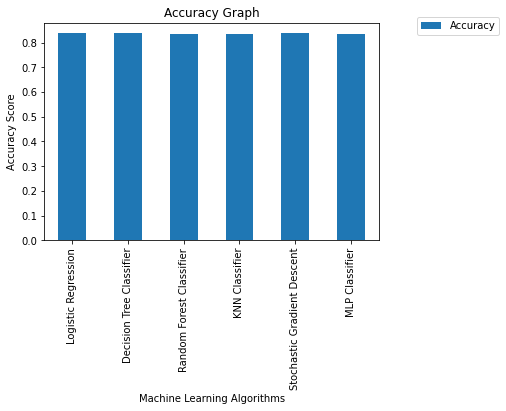

In [87]:
cv_sum()

### Overall Performance

In [88]:
overview

,Fit Time,Score Time,Accuracy,Precision,Recall,F1 score
Logistic Regression,13.3060,0.0078,0.8373,0.6676,0.5946,0.7620
Decision Tree Classifier,12.6447,0.0078,0.8380,0.6624,0.6171,0.7664
Random Forest Classifier,12.5384,0.0075,0.8364,0.6520,0.6314,0.7674
KNN Classifier,12.1429,0.0075,0.8330,0.6488,0.6089,0.7599
Stochastic Gradient Descent,12.1392,0.0076,0.8369,0.6580,0.6147,0.7650
MLP Classifier,12.2316,0.0075,0.8362,0.6565,0.6143,0.7642


### Overall Performance Graph

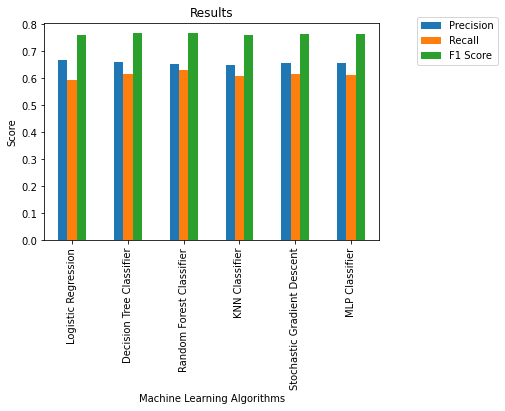

In [89]:
performance_sum()